# Prioritizing hypotheses and the A/B test results analyzing

There are a list of hypotheses that may help boost revenue of a big online store. It's necessary to prioritize these hypotheses in order to cut expenses on experimentation and test only the most promising ideas. 

There are the results of the A/B test of one of the the hypotheses. 
The purpose of the study: to analyze the results of the A/B test and make a business decision based on the findings of this analysis.

There are 2 parts of works:

<a href='#section1'>Part 1. Prioritizing Hypotheses</a>

<a href='#section2'>Part 2. A/B Test Analysis</a>

In [1]:
# importing of libraries
import pandas as pd
import seaborn as sns
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

# some global constats for formatting the output string
BOLD = '\033[1m'
END = '\033[0m'

## Part 1. Prioritizing Hypotheses
<a id='section1'></a>

In [2]:
# reading file that contains the hypotheses parameters  
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

# Let's look at the parameters Reach, Impact, Confident and Effort of the hypotheses.
pd.set_option('display.max_colwidth', -1)
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


We have 9 hypotheses for testing them with different values of the Reach, Impact, Confidence and Effort parameters.

Let's consider these values in more detail.

__Reach__

Adding a subscription form will reach all users (#7). Many users are likely to use product recommendation blocks (#2) and finding the products by opropriete category (#3).

__Impact__

Acquaring new users with two new channels will have the maximum Impact (#0). The birthday discount promotion strongly affects on users (#8). All user can experience with the subscription form (#7).

__Effort__

Launching your own delivery service and changing the category structure require maximum developer involvement.

__Confidence__

For most hypotheses, we are confident in evaluating the rest of the parameters. But it is difficult to assess the impact of changing the background color on the main page (#4) or adding a customer review page (#5).
It is also quite difficult to estimate exactly how much work will be required for development of the delivery service (#1) or changing the category structure (#3).

In [3]:
# Let's apply the ICE framework to prioritize hypotheses.
hypotheses['ICE'] = hypotheses.Impact * hypotheses.Confidence / hypotheses.Effort 
hypotheses[['Hypothesis', 'ICE']].sort_values('ICE', ascending=False)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


__The most promising hypothesis according ICE is #8__ with a high level of Impact and Confidance and a middle level of Effort, __followed by hypotheses #0, #7__, (they have also a high level of Impact and Confidance and a middle level of Effort) __and #6__ (the impact is not very strong, but not a lot of resources are required to conduct the test and we are confident in these assessments of Impact and Effort). 

In [4]:
# Let's apply the RICE framework to prioritize hypotheses.
hypotheses['RICE'] = hypotheses.Reach * hypotheses.Impact * hypotheses.Confidence / hypotheses.Effort 
hypotheses[['Hypothesis', 'RICE']].sort_values('RICE', ascending=False)

,Hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


__The most promising hypothesis according RICE is #7__ with adding a subscription form which has a high level of Reach, Impact and Confidance and a middle level of Effort.
RICE __next hypothesis is #2__ with adding product recommendation blocks that has also high level of Reach, but the impact is not very strong as well as not a lot of resources are required to conduct the test, nevertheless, we are fairly confident in these assessments of Reach, Impact and Effort.
__Then #0 and #6 hypotheses follow with the same score__. The hypothesis #0 has a high level of Impact and Confidance and a middle level of Effort although Reach is not very broad. The hypothesis #6 has a middle level of Reach but not a very strong impact, although not a lot of resources are required to conduct the test and we are confident in these assessments of Reach, Impact and Effort.

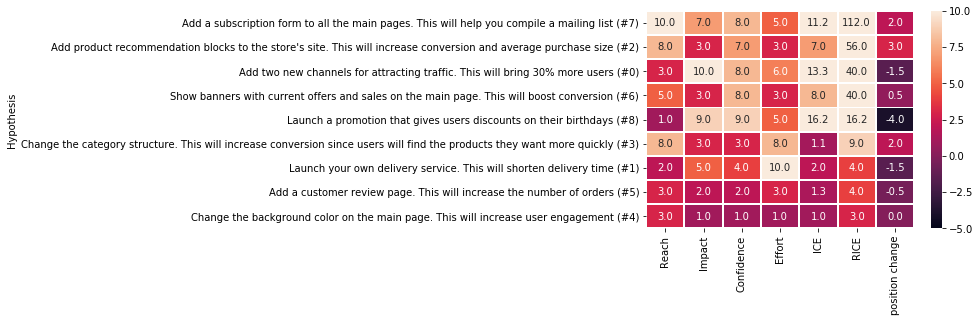

In [5]:
# Let's look at how the prioritization of hypotheses changes when the RICE framework is used instead of the ICE one.
# calculating of the position change in the rating
hypotheses['position change'] = hypotheses['RICE'].rank() - hypotheses['ICE'].rank()

# adding the hypothesis number to the hypothesis brief descriptions
hypotheses['Hypothesis'] = hypotheses.Hypothesis + ' (#' + hypotheses.index.astype('str') + ')'
hypotheses.set_index('Hypothesis', inplace=True)

# plotting a heat map of hypotheses parameters
sns.heatmap(hypotheses.sort_values('RICE', ascending=False), annot=True, fmt='.1f', vmin=-5, vmax=10,
            linewidths=1);

The hypotheses with adding product recomendation blocks (#2) and adding a subscription form (#7) moved up 3 and 2 points, respectively, due to their wide reach. On the contrary, the hypothesis with the birthday discount promotion (#8) dropped by 4 points due to the small reach. Looks reasonable, since the effect can only be observed once a year for each user.

### Main conclusions

There are a list of 9 hypotheses that may help boost revenue of a big online store. These hypotheses have a variety of values for Reach, Impact, Confidence, and Effort. Both ICE and RICE frameworks give the same top 5 hypotheses for priority testing, but with a different order of priority:

1. Add a subscription form to all the main pages. This will help you compile a mailing list. (#7)
2. Add product recommendation blocks to the store's site. This will increase conversion and average purchase size. (#2)
3. Add two new channels for attracting traffic. This will bring 30% more users (#0)
4. Show banners with current offers and sales on the main page. This will boost conversion (#6)
5. Launch a promotion that gives users discounts on their birthdays (#8)

The most promising hypothesis according RICE is #7 with adding a subscription form, although the most promising hypothesis according ICE is #8 with the birthday discount promotion. The former has the maximum Reach, while the latter has the minimum one. Reach is an important parameter for boosting the revenue. Hypothesis with adding a subscription has one the most highest levels of Reach, Impact and Confidance and a middle level of Effort. Thus, it is worth starting testing hypotheses with this one and follow according to the priorities proposed by RICE (see the list above).

## Part 2. A/B Test Analysis
<a id='section2'></a>

In [6]:
# some useful functions
# function to calculate purchase size based on revenue and the number of oders
def get_purchase_sizes(table, suffix=''):
    return table['revenue'+suffix] / table['orders'+suffix]

# function to conduct the Mann-Whitney U test for two samples
def mann_whitneyu_test(sample1, sample2, description):
    print(BOLD + 'Mann-Whitney U test:' + END)
    alpha = 0.05
    print('Hypotheses:')
    print(BOLD + 'H\u2080: Sample distributions of ' + description + ' are equal.'+ END)
    print(BOLD +'H\u2081: Sample distributions of ' + description + ' are not equal.' + END)
    pvalue = stats.mannwhitneyu(sample1, sample2, alternative='two-sided')[1]
    print("Mann-Whitney U test, p-value: ", pvalue)
    if (pvalue < alpha): 
        print(BOLD + "We reject the hypothesis H\u2080"+ END) 
        print()
        print('The relative difference in average is {:.1%}'.format(sample2.mean()/sample1.mean()-1))
    else: 
        print(BOLD + "We can't reject the hypothesis H\u2080"+ END) 

In [7]:
# reading file that contains the A/B test results 
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

# looking at the data's general information 
print(BOLD + 'General information:' + END)
print(BOLD + 'The table containing information about orders data:' + END)
print(orders.info())
print()
print(BOLD + 'The table containing information about visits data:' + END)
print(visits.info())
print()

# looking at the first few rows in tables
print(BOLD + 'The first few rows in the table containing information about orders:' + END)
display(orders.head())
print(BOLD + 'The first few rows in the table containing information about visits:' + END)
display(visits.head())

General information:
The table containing information about orders data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None

The table containing information about visits data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

The first few rows in the table containing information about orders:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


The first few rows in the table containing information about visits:


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


The first table contains __1197 records of user purchases__ made during the testing period, with the test group specified.

The second table contains __62 rows with the number of visits__ on the specified date and with the test group specified.

For the `'date'` columns the __object__ type is used. It is worth converting it to __datetime__ type for more convenient work with dates. The `'group'` columns could be converted to category type, but this is not necessary since the dataset is small.

In [8]:
# converting to datatime type:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

The type for the `'date'` columns was changed to datetime to make them convenient to work with it.

In [9]:
# Let's look at main statistics for features by group.
print(BOLD + 'Some statistics for orders features by group:' + END)
display(orders.groupby('group').agg({'visitorId': 'nunique',
                                     'transactionId': 'count',
                                     'date': ['min', 'max'],
                                     'revenue': ['min', 'max', 'mean', 'median', 'std']}).round(2))

print(BOLD + 'Some statistics for visits features by group:' + END)
display(visits.groupby('group').agg({'date': ['min', 'max'],
                                     'visits': ['min', 'max', 'mean', 'median', 'std', 'sum']}).round(2))

Some statistics for orders features by group:


visitorId transactionId       date            revenue                   \
        nunique         count        min        max     min      max    mean   
group                                                                          
A      503       557          2019-08-01 2019-08-31  5.0     1450.2   115.90   
B      586       640          2019-08-01 2019-08-31  5.1     19920.4  145.06   

                      
      median     std  
group                 
A      50.10  182.36  
B      50.35  806.99

Some statistics for visits features by group:


date            visits                                   
             min        max    min  max    mean median     std    sum
group                                                                
A     2019-08-01 2019-08-31  361    756  604.39  619    112.40  18736
B     2019-08-01 2019-08-31  369    770  610.19  654    118.16  18916

The dataset contains data from an A/B test conducted __in August 2019__. 
The __total number of visits__ to the online store for each group was almost __19,000__. The minimum number of visits per day for each group was about 360, the maximum is just over 750. 
__503 visitors from group A and 586 visitors from group B made orders, with group A making 557 purchases and group B making 640 purchases__. __The average check for each group was about \\$50__. The minimum order size for each group was about \\$5. The maximum order size for group A was around \\$1,500, and for group B was almost \\$20,000, the latter looks like an outlier.  

In [10]:
# Let's look at the intersection of groups A and B by visitors. 
# It must be empty.
intersection_of_AB_visitors = orders.groupby('visitorId').group.nunique().reset_index()\
                                .query('group>1').visitorId
print(BOLD + 'The number of visitors that got into both group A and group B:' + END, len(intersection_of_AB_visitors))

The number of visitors that got into both group A and group B: 58


The intersection of groups A and B by visitors is not empty. We should drop the visitors that got into 2 groups since we can't know for sure what they saw and what influenced their behavior.

In [11]:
# Let's remove visitors that got into 2 groups from dataset

# function to get orders dates and the number of orders to filter out
def get_orders_to_filter_out(orders_to_filter_out):
    return orders_to_filter_out.groupby(['date', 'group']).transactionId.nunique()\
               .reset_index().rename(columns={'transactionId':'orders'})

# function to get visits without orders of unacceptable visitors
# We cannot exclude all visits of unacceptable users, because the dataset does not contain visits by 'visitorId',
# but we can exclude all orders of these users from visits.
def get_visits_filtered(orders_to_filter_out):
    visits_filtered = visits.merge(get_orders_to_filter_out(orders_to_filter_out),
                                   on=['date', 'group'],
                                   how='left').fillna(0) 
    visits_filtered['visits'] = visits_filtered.visits - visits_filtered.orders
    return visits_filtered[['date', 'group', 'visits']]

# removing the visitors that got into 2 groups from visits
orders_to_filt_out = orders[orders['visitorId'].isin(intersection_of_AB_visitors)]
visits = get_visits_filtered(orders_to_filt_out)

# removing the visitors that got into 2 groups from orders
orders = orders[~orders['visitorId'].isin(intersection_of_AB_visitors)]

Visitors that got into both group A and group B were removed from orders as well all orders of these visitors were excluded from visits.

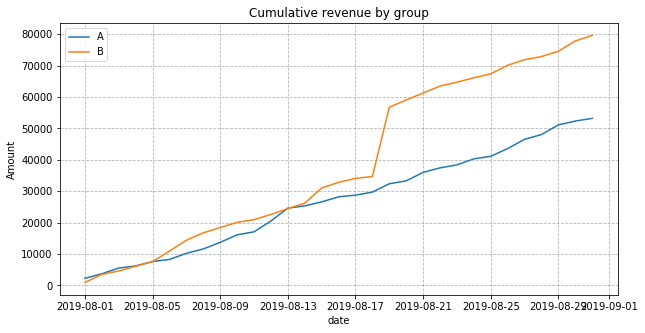

In [12]:
# Let's plot the graph of cumulative revenue by group.
# function to calculate cummulative data for orders and visits
def get_cumulative_data(orders, visits):
    # building an array with unique paired date-group values 
    dates_groups = orders[['date','group']].drop_duplicates() 

    # getting aggregated cumulative daily data on orders  
    orders_aggregated = dates_groups.apply(
        lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                        orders['group'] == x['group'])]\
            .agg({'date' : 'max', 
                  'group' : 'max', 
                  'transactionId' : 'nunique', 
                  'visitorId' : 'nunique', 
                  'revenue' : 'sum'}), axis=1)\
            .sort_values(by=['date','group']) 

    # getting aggregated cumulative daily data on visitors   
    visitors_aggregated = dates_groups.apply(
        lambda x: visits[np.logical_and(visits['date'] <= x['date'],
                                        visits['group'] == x['group'])]\
            .agg({'date' : 'max',
                  'group' : 'max',
                  'visits' : 'sum'}), axis=1)\
            .sort_values(by=['date','group']) 

    # merging the two tables into one and giving its columns descriptive names 
    cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date', 'group']) 
    cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors'] 
    
    return cumulative_data

# function to plot the graph of cumulative revenue by group
def plot_cum_revenue(cum_data):
    fig, ax = plt.subplots(figsize=(10, 5))
    
    for name, group in cum_data.groupby('group'):
        ax.plot(group.date, group.revenue, label=name);
    ax.legend();
    ax.set_title('Cumulative revenue by group')
    ax.set_xlabel('date')
    ax.set_ylabel('Amount')
    ax.grid(linestyle='--', color='dimgray', alpha=0.5)

# calulating cummulative data for orders and visits    
cumulative_data = get_cumulative_data(orders, visits)

# plotting the groups revenue graph 
plot_cum_revenue(cumulative_data)

Revenue is growing steadily throughout the whole test. Nevertheless, we can see the surges in revenue at certain points for group B. This may imply either an increase in the number of orders or the presence of very expensive orders in the sample. 

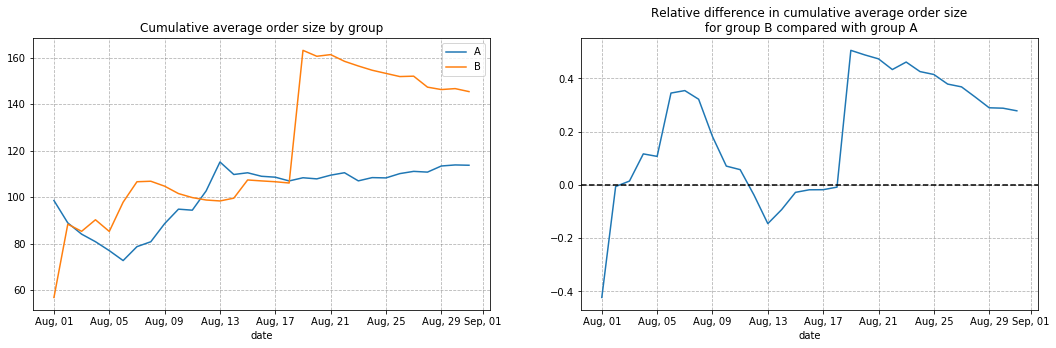

In [13]:
# Let's plot graphs of cumulative average order size by group and their relative difference.
# function to plot the cumulative average purchase size by group and their relative difference
def plot_avg_purchase_size(cum_data):
    fig, axes = plt.subplots(ncols=2, figsize=(9*2, 5))
    
    # plotting cumulative average order size by group
    for name, group in cum_data.groupby('group'): 
        axes[0].plot(group.date, get_purchase_sizes(group), label=name);
    axes[0].legend();
    axes[0].set_title('Cumulative average order size by group');
    
    # gathering the group data into pivot table 
    cum_data_pivot = cum_data.pivot_table(index='date', columns='group', values=['revenue', 'orders'])\
                        .reset_index()
    cum_data_pivot.columns = [''.join(col) for col in cum_data_pivot.columns]

   
    # plotting a relative difference graph for the average purchase sizes 
    axes[1].plot(cum_data_pivot.date, 
             get_purchase_sizes(cum_data_pivot, 'B')/get_purchase_sizes(cum_data_pivot, 'A')-1); 
    axes[1].set_title('Relative difference in cumulative average order size\n for group B compared with group A');

    # adding the X axis 
    axes[1].axhline(y=0, color='black', linestyle='--');
    
    for i in range(2):
        axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%b, %d'))
        axes[i].grid(linestyle='--', color='dimgray', alpha=0.5)
        axes[i].set_xlabel('date')
    plt.show()

# ploting the cumulative average purchase size by group and their relative difference
plot_avg_purchase_size(cumulative_data)

By the end of the test, the average purchase size has practically stabilized. It is stabilizing for group A and continues to slightly fall for group B. The surge in group B in the middle of the test could be due to the presence of large and expensive orders.

At several points, the difference between the groups spikes. This imply there must be large orders and ouliers.

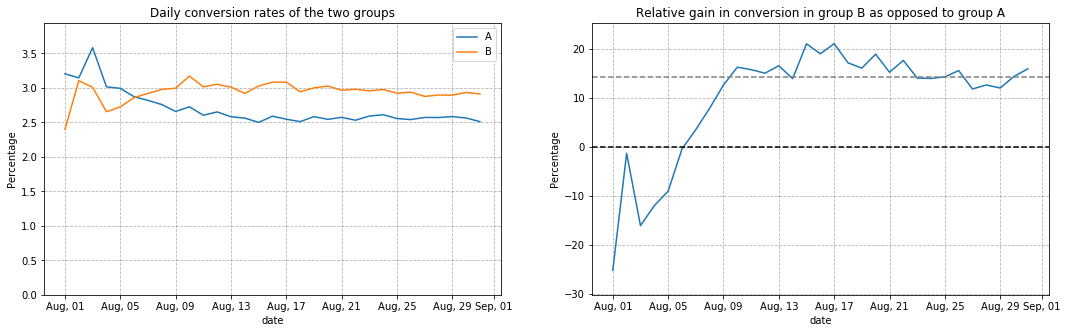

In [14]:
# Let's consider the conversion rate.
# function to add each group's conversion rate as the ratio of orders to the number of visits for each day
def add_conversion(data):
    data['conversion'] = data.orders / data.visitors * 100 
    return data

# function to plot the daily conversion rates of the two groups based on the cumulative data 
def plot_cum_conversion(cumulative_data):

    fig, axes = plt.subplots(ncols=2, figsize=(9*2, 5))
 
    # plotting the daily conversion rates of the two groups
    for name, group in cumulative_data.groupby('group'):
        axes[0].plot(group.date, group.conversion, label=name);
    axes[0].legend();
    axes[0].set_title('Daily conversion rates of the two groups')
    axes[0].set_ylim((0, cumulative_data.conversion.max()*1.1));

    # gathering the group data into pivot table 
    conversion_pivot = cumulative_data.pivot_table(index='date', columns='group', values='conversion').reset_index()
    conversion_pivot['conversion_rate'] = (conversion_pivot.B / conversion_pivot.A - 1) * 100
    
    # plotting a relative difference graph for the cumulative conversion rate
    axes[1].plot(conversion_pivot.date, conversion_pivot.conversion_rate);
    axes[1].set_title('Relative gain in conversion in group B as opposed to group A')
    

    axes[1].axhline(y=0, color='black', linestyle='--') 
    axes[1].axhline(y=conversion_pivot.conversion_rate[-int(len(conversion_pivot)/3):].mean(),
                color='grey', linestyle='--') 
    axes[1].set_ylim((conversion_pivot.conversion_rate.min()*1.2, conversion_pivot.conversion_rate.max()*1.2))
    
    for i in range(2):
        axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%b, %d'))
        axes[i].grid(linestyle='--', color='dimgray', alpha=0.5)
        axes[i].set_xlabel('date')
        axes[i].set_ylabel('Percentage')
    plt.show()
        
# adding each group's conversion rate to cumulative data
cumulative_data = add_conversion(cumulative_data) 

# plotting the daily conversion rates of the two groups and their relative difference based on the cumulative data 
plot_cum_conversion(cumulative_data)

The groups were fluctuating around the same value, but then the conversion rate of group B rose before stabilizing, while the conversion rate of group A decreased, but then stabilized as well. 

At the beginning of the test, group B lagged behind, but then suddenly took the lead. Then its conversion decreased relatively again, and now the difference has almost stabilized. 
 
Either way, it's worth looking at the anomalies first. They can somehow change the picture.

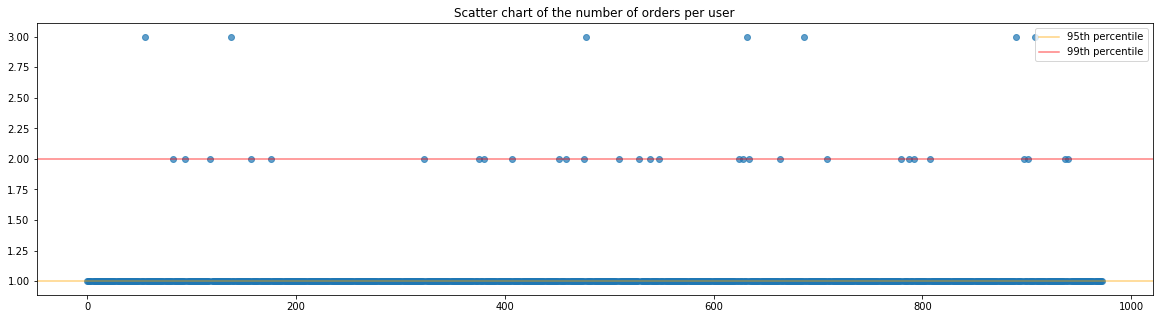

The 95th percentile for the number of orders per user is 1
The 99th percentile for the number of orders per user is 2


In [15]:
# Let's find the number of orders per user and plot its scatter chart.
orders_by_users = orders.groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
orders_by_users.columns = ['visitorId','orders']

# function to plot a scatter chart and to print 95th and 99th percentiles
def plot_scatter_chart(series, name, figsize=(20, 5)):
    x_values = pd.Series(range(0,len(series))) 
    plt.figure(figsize=figsize)
    plt.scatter(x_values, series, alpha=0.7);
    for perc, color in zip([95, 99], ['orange', 'red']):
        plt.axhline(y=np.percentile(series, perc), label=str(perc)+'th percentile',
                    color=color, alpha=0.5) 
    plt.legend()
    plt.title('Scatter chart of ' + name)
    plt.show()

    # printing 95th and 99th percentiles
    for perc in [95, 99]:
        print('The {}th percentile for'.format(perc), name, 'is', round(np.percentile(series, perc)))

        
# plotting a scatter chart of the number of orders per user and printing 95th and 99th percentiles for it
plot_scatter_chart(orders_by_users.orders, 'the number of orders per user')

The majority of visitors placed only one order. There are very few users with more than two orders. These cases may turn out to be anomalies. 

Not more than 5% of visitors placed more than one order, and not more than 1% of visitors made more than two. 
 
Thus, we could set __three orders per user as the lower limit for the number of orders__ and to filter orders on that basis. 

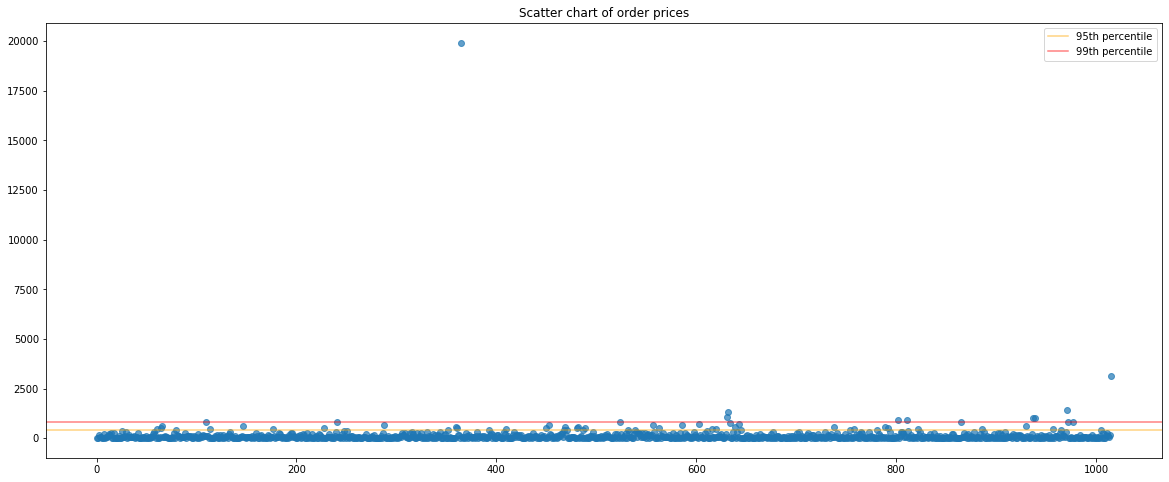

The 95th percentile for order prices is 414
The 99th percentile for order prices is 830


In [16]:
# plotting a scatter chart of order prices and printing 95th and 99th percentiles for them
plot_scatter_chart(orders.revenue, 'order prices', (20, 8))

There are few big orders. The order of $20,000 definitely looks pretty anomalous.

Not more than 5% of users placed orders that cost more than \\$414. Not more than 1% placed orders more expensive than $830. 

Based on this we can set __the limit for abnormal orders as \\$1000__ to filter out most extreme observations.

In [17]:
# Let's find the statistical significance of differences in conversion rate and order size between the groups,
# using the "raw" data.

# Let's start by preparing the data for testing the statistical significance of differences in conversion rate.
# We can use the equal proportion hypothesis testing, but we can test it in a different way.
# Let's build a series of the number of purchases for each visitor, for those who did not order anything it will be 0.
# The average value of such a series will be equal to the ratio of the total number of purchases during the test 
# to the total number of visits, i.e. it's our chosen metric, namely conversion rate.

# calulating the number of purchases for each visitor in the group
user_oders_by_group = orders.groupby(['group', 'visitorId'], as_index=False)\
                        .agg({'transactionId' : 'nunique'})
user_oders_by_group.columns = ['group', 'visitorId', 'orders']

# function to calculate the number of visits without orders by group
def get_users_without_orders_num(group, visits, user_oders_by_group):
    return int(visits.query('group==@group').visits.sum() - len(user_oders_by_group.query('group==@group')))

# function to build a sample by group using the raw data
# (a sample contains the number of orders for each visitor and 0 for visits without purchase) 
def get_orders_sample(group):
    return pd.concat([user_oders_by_group.query('group==@group').orders,
                      pd.Series([0]*get_users_without_orders_num(group, visits, user_oders_by_group))])

# building samples for testing the statistical significance of the difference in conversion between the groups
# using the raw data
sampleA = get_orders_sample('A')
sampleB = get_orders_sample('B')

# testing the statistical significance of the difference in conversion between the groups using the raw data
print(BOLD 
    + 'The statistical significance test of the difference in conversion between the groups using the raw data:' 
    + END)
print()
mann_whitneyu_test(sampleA, sampleB, 'the number of orders per user')
print('Conversion in group A is {:.2%}'.format(sampleA.mean()))
print('Conversion in group B is {:.2%}'.format(sampleB.mean()))
print('\n')

# testing the statistical significance of the difference in average order size between the groups using the raw data
print(BOLD 
    +'The the statistical significance of the difference in average order size between the groups using the raw data:' 
    + END)
print()
mann_whitneyu_test(orders.query("group=='A'").revenue,
                   orders.query("group=='B'").revenue, 
                   'the order size per user')

The statistical significance test of the difference in conversion between the groups using the raw data:

Mann-Whitney U test:
Hypotheses:
H₀: Sample distributions of the number of orders per user are equal.
H₁: Sample distributions of the number of orders per user are not equal.
Mann-Whitney U test, p-value:  0.0109567830835148
We reject the hypothesis H₀

The relative difference in average is 16.0%
Conversion in group A is 2.51%
Conversion in group B is 2.91%


The the statistical significance of the difference in average order size between the groups using the raw data:

Mann-Whitney U test:
Hypotheses:
H₀: Sample distributions of the order size per user are equal.
H₁: Sample distributions of the order size per user are not equal.
Mann-Whitney U test, p-value:  0.8622329690015668
We can't reject the hypothesis H₀


We reject the null hypothesis of equality of sample distributions of the number of orders per visitors in the groups since the p-value is lower than 0.05. And since the average order size is also a conversion rate (the ratio of the number of orders to the number of visitors the website got), then __the raw data analysis showed that the groups' conversion rates have statistically significant differences. The relative conversion gain for group B compared with group A is 16%.__ 

Nevertheless, we can't reject the null hypothesis about equality of sample distributions of order sizes in two groups since the p-value is considerably higher than 0.05. __There's no reason to conclude that average order size differs between the groups.__

Thus, __on average, the number of purchases in group B is higher and the relative increase in conversions for group B compared to group A is 16%, while the average purchase check does not differ.__

The total number of anomalous visitors: 14

The cumulative average order size by group and their relative difference based on filtered data:


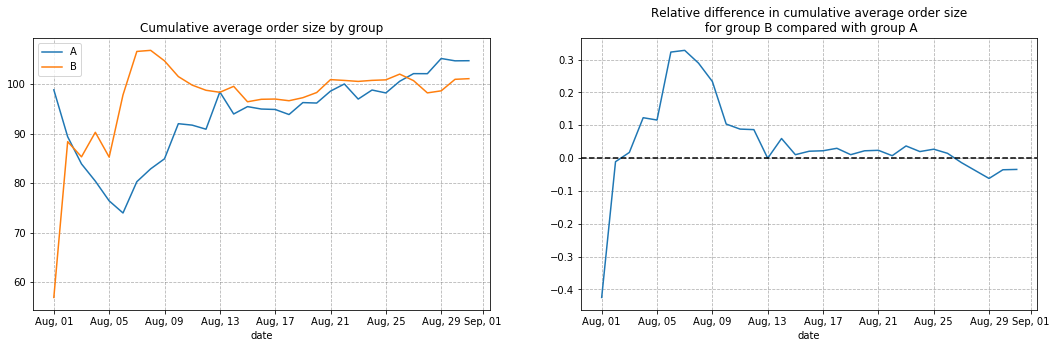

The daily conversion rates of the two groups and their relative difference based on filtered data:


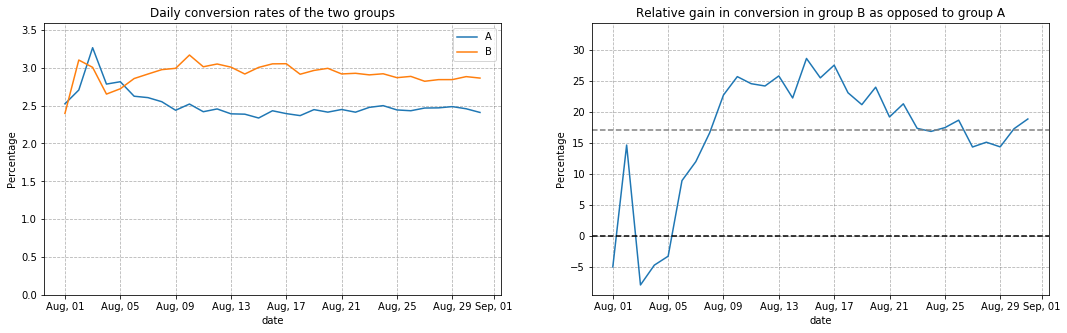

In [18]:
# Let's remove anomalies from our data. 

# function to get a list of visirors with abnormal orders number per day or abnormal orders size
def get_abnormal_users(max_orders_num, max_revenue):
    many_orders_users = user_oders_by_group.query('orders>@max_orders_num').visitorId
    expensive_orders_users = orders.query('revenue>@max_revenue').visitorId
    return pd.concat([many_orders_users, expensive_orders_users], axis = 0).drop_duplicates().sort_values()

# getting anomalous visitors who place more than two orders or one order bigger than $1,000. 
abnormal_users = get_abnormal_users(2, 1000)
print(BOLD + 'The total number of anomalous visitors:' + END, len(abnormal_users))
print()

# removing the anomalous visitors from orders
orders_filtered = orders[~orders['visitorId'].isin(abnormal_users)]

# removing the anomalous visitors from visits
orders_to_filt_out = orders[orders['visitorId'].isin(abnormal_users)]
visits_filtered = get_visits_filtered(orders_to_filt_out)


# Let's look at how removing abnormal visitors affects 
# * the cumulative average order size by group and their relative difference
# * the daily conversion rates of the two groups and their relative difference

print(BOLD + 'The cumulative average order size by group and their relative difference based on filtered data:' + END)
cumulative_data_filtered = get_cumulative_data(orders_filtered, visits_filtered)
plot_avg_purchase_size(cumulative_data_filtered)

print(BOLD +'The daily conversion rates of the two groups and their relative difference based on filtered data:'+ END)
cumulative_data_filtered = add_conversion(cumulative_data_filtered)
plot_cum_conversion(cumulative_data_filtered)

We have __14 anomalous visitors__ in total. 

After filtering the data, 2 significant surges in the order size were removed. The graphs have become smoother. And at some point the difference bacame small. But then the average order size of group B rose before stabilizing, while the average order size of group A decreased at the beginning of the test and then began to rise.

The graphs for conversion almost didn't change. Only the conversion for both group is slightly lower since the number of orders decreased. Perhaps if we remove abnormal visitors from their visit table more carefully (by `'visitorId'`), the conversion would have shifted less.

In [19]:
# Let's try to find out how removing abnormal visitors affects the test results.

# function to build a sample by group using the filtered data
# (a sample contains the number of orders for each visitor and 0 for visits without purchase) 
def get_filtere_orders_sample(group, users_to_filter_out):
    orders_to_filt_out = orders[orders['visitorId'].isin(abnormal_users)]
    visits_filt = get_visits_filtered(orders_to_filt_out)
    user_oders_by_group_filt = user_oders_by_group.query('visitorId not in @users_to_filter_out')
    
    return pd.concat([user_oders_by_group_filt.query('group==@group').orders,
                      pd.Series([0]*get_users_without_orders_num(group, visits_filt, user_oders_by_group_filt))])

# building samples for testing the statistical significance of the difference in conversion between the groups
# using the filtered data
sampleA_filtered = get_filtere_orders_sample('A', abnormal_users)
sampleB_filtered = get_filtere_orders_sample('B', abnormal_users)

# calculate the statistical significance of the differences in conversion between the groups using filtered data
print(BOLD 
    + 'The statistical significance test of the difference in conversion between the groups using filtered data:' 
    + END)
print()
mann_whitneyu_test(sampleA_filtered, sampleB_filtered, 'the number of orders per user')
print('Conversion in group A is {:.2%}'.format(sampleA_filtered.mean()))
print('Conversion in group B is {:.2%}'.format(sampleB_filtered.mean()))
print('\n')


# testing the statistical significance of the difference in average order size between the groups using filtered data
print(BOLD 
   +'The the statistical significance of the difference in average order size between the groups using filtered data:' 
   + END)
print()
mann_whitneyu_test(orders.query("group=='A' and visitorId not in @abnormal_users").revenue,
                   orders.query("group=='B' and visitorId not in @abnormal_users").revenue, 
                   'the order size per user')

The statistical significance test of the difference in conversion between the groups using filtered data:

Mann-Whitney U test:
Hypotheses:
H₀: Sample distributions of the number of orders per user are equal.
H₁: Sample distributions of the number of orders per user are not equal.
Mann-Whitney U test, p-value:  0.0071525219855577095
We reject the hypothesis H₀

The relative difference in average is 18.9%
Conversion in group A is 2.41%
Conversion in group B is 2.86%


The the statistical significance of the difference in average order size between the groups using filtered data:

Mann-Whitney U test:
Hypotheses:
H₀: Sample distributions of the order size per user are equal.
H₁: Sample distributions of the order size per user are not equal.
Mann-Whitney U test, p-value:  0.8146412225461763
We can't reject the hypothesis H₀


The Mann-Whitney U test rejects the null hypothesis about equality of the number of orders per visitors in the groups on filtered data as well. As happened with raw data, we've reached the significance level. The relative increase in conversions for group B compared to group A is almost 19% on filtered data.

The Mann-Whitney U test doesn't reject the null hypothesis about equality of average order size in the groups at a significance level of 0.05. Thus, there is likely no difference between the samples. Thus, neither raw nor filtered data revealed any statistically significant differences in average order size between the groups. 

### Main conclusions

During the A/B test analysis, the following facts were identified:

* There's a statistically significant difference in conversion between the groups, according to both the raw and the filtered data. 
* Neither raw nor filtered data revealed any statistically significant differences in average order size between the groups.
* The graph of the difference in conversion between the groups shows that group B's results are better than those of group A: they have stabilized around the mean, according to both the raw and the filtered data.  
* The graph of the difference in average purchase size shows fluctuations: it fluctuates near zero on filtered data.

Thus, on average, the number of purchases in group B is statistically significantly higher than those in group A, while the average purchase check does not differ. This should lead to increased revenue. The relative increase in conversions for group B compared to group A is about 16-19%. Moreover, the conversion rate graph as well as graphs of differences in conversion and purchases sizes indicate that the results are stable.

Based on these facts, we can conclude that the test is successful and should be stopped.